In [ ]:
# GE 461 Project 3 Supervised Learning Fahad Waseem Butt 21801356

# Upload the dataset file from the device's local drive.
# Upload when prompted, from below the code block.

# Importing Libraries
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Uploading dataset
uploaded = files.upload()

Saving test1.txt to test1 (1).txt
Saving train1.txt to train1 (1).txt


In [ ]:
# Calling and assigning .txt files
trainIN = pd.read_csv("train1.txt", sep="\t", header=None).to_numpy()
trainIN = np.delete(trainIN, 1, 1).T
# print(trainIN)

trainOUT = pd.read_csv("train1.txt", sep="\t", header=None).to_numpy()
trainOUT = np.delete(trainOUT, 0, 1).T
# print(trainOUT)

testIN = pd.read_csv("test1.txt", sep="\t" , header=None).to_numpy()
testIN = np.delete(testIN, 1, 1).T
# print(testIN)
testOUT = pd.read_csv("test1.txt", sep="\t", header=None).to_numpy()
testOUT = np.delete(testOUT, 0, 1).T
# print(testOUT)

In [ ]:
# Normalized
min_TIN=np.amin(trainIN)
max_TIN=np.amax(trainIN)
trainX = (trainIN-min_TIN+1)/(max_TIN-min_TIN)
# print(trainX)
# print(trainX.shape)

min_TOUT=np.amin(trainOUT)
max_TOUT=np.amax(trainOUT)
trainY = (trainOUT-min_TOUT+1)/(max_TOUT-min_TOUT)
# print(trainY)
# print(trainY.shape)

min_TINT=np.amin(testIN)
max_TINT=np.amax(testIN)
testX = (testIN-min_TINT+1)/(max_TINT-min_TINT)
# print(testX)
# print(testX.shape)

min_TOUTT=np.amin(testOUT)
max_TOUTT=np.amax(testOUT)
testY = (testOUT-min_TOUTT+1)/(max_TOUTT-min_TOUTT)
# print(testY)
# print(testY.shape)

In [ ]:
def variable_init(input, hidden, output):
    np.random.seed(10) 
    W1 = np.random.randn(hidden, input)*0.05
    b1 = np.zeros((hidden, 1))
    W2 = np.random.randn(output, hidden)*0.05
    b2 = np.zeros((output, 1))
    variables = [W1, b1, W2, b2]
    return variables

In [ ]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
def forward_propagation(X, variables):
    W1 = variables[0]
    b1 = variables[1]
    W2 = variables[2]
    b2 = variables[3]
    
    Z1 = np.dot(W1, X) + b1
    O1 = sigmoid(Z1) 
    Z2 = np.dot(W2, O1) + b2
    O2 = sigmoid(Z2)
    temp = [Z1, O1, Z2, O2]
    
    return O2, temp

In [ ]:
def sum_squared_errors(O2, Y):
    loss = np.sum(np.square(np.subtract(Y,O2)))
    loss = float(np.squeeze(loss))

    return loss

In [ ]:
def backward_propagation(variables, temp, X, Y):
    m = X.shape[1]
    
    W1 = variables[0]
    W2 = variables[2]
    O1 = temp[1]
    O2 = temp[3]
   
    dZ2 = O2-Y
    dW2 = (1/m) * np.dot(dZ2, O1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(O1, 2))
    dW1 = (1/m) * np.dot(dZ1, X.T) 
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
    
    derivs = [dW1, db1, dW2, db2]
    
    return derivs

In [ ]:
def gradient_descent(variables, derivs, learning_rate = 0.9):
    W1 = variables[0]
    b1 = variables[1]
    W2 = variables[2]
    b2 = variables[3]
   
    dW1 = derivs[0]
    db1 = derivs[1]
    dW2 = derivs[2]
    db2 = derivs[3]

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    variables = [W1,  b1, W2, b2]
    
    return variables

In [ ]:
def prediction(variables, X):
    O2, temp = forward_propagation(X, variables)
    predictions = O2
    
    return predictions

In [ ]:
def neural_network_model(X, Y, n_hidden, num_iterations):
    np.random.seed(3)

    input_unit = trainX.shape[0]
    output_unit = trainY.shape[0]   
    variables = variable_init(input_unit, n_hidden, output_unit)
   
    W1 = variables[0]
    b1 = variables[1]
    W2 = variables[2]
    b2 = variables[3]
    
    cost = []
    for i in range(0, num_iterations):
        O2, temp = forward_propagation(X, variables)
        loss = sum_squared_errors(O2, Y)
        derivs = backward_propagation(variables, temp, X, Y)
        variables = gradient_descent(variables, derivs)
        cost.append(loss)
        if i % 50 == 0:
            print ("Loss after %i iterations: %f" %(i, loss))
    plt.show()
    print("\n", cost)
    print("\n Standard Deviation in Loss = ", np.std(cost))
    print("\n Loss Averaged Over Instances", np.mean(cost))
    return variables

With 2 Hidden Units:
Loss after 0 iterations: 6.995480
Loss after 50 iterations: 2.248942
Loss after 100 iterations: 2.327482
Loss after 150 iterations: 2.277851
Loss after 200 iterations: 2.160334
Loss after 250 iterations: 1.979190
Loss after 300 iterations: 1.734226
Loss after 350 iterations: 1.479821
Loss after 400 iterations: 1.288748
Loss after 450 iterations: 1.629725
Loss after 500 iterations: 1.575194
Loss after 550 iterations: 1.543532
Loss after 600 iterations: 1.520613
Loss after 650 iterations: 1.504165
Loss after 700 iterations: 1.492760
Loss after 750 iterations: 1.485448
Loss after 800 iterations: 1.481530
Loss after 850 iterations: 1.480444
Loss after 900 iterations: 1.481703
Loss after 950 iterations: 1.486777
Loss after 1000 iterations: 1.421776

 [6.995480251572768, 4.199344611615024, 3.5752185238343155, 3.132898785860906, 2.7805975049460168, 2.512921483665139, 2.3220035557200314, 2.19453087906124, 2.114863578816377, 2.068595315519369, 2.0443815397118295, 2.03416819

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Loss after 950 iterations: 2.803199
Loss after 1000 iterations: 2.803199

 [6.721373154285065, 5.692473391023312, 5.150881997889772, 4.8118095949273245, 4.558228089172341, 4.335865082468739, 4.13305821438773, 3.956626082860199, 3.8105525383241057, 3.6923509845626703, 3.5964872784277335, 3.517325334853082, 3.4503188816079677, 3.392162781425802, 3.3405888712177405, 3.2940949495466167, 3.251702058924867, 3.2127686137162965, 3.1768620994432184, 3.143676801764469, 3.112983415525298, 3.084598806590653, 3.058367924142056, 3.034152973241871, 3.011826999463667, 2.9912702168501957, 2.972368058397785, 2.955010291997361, 2.9390907651175997, 2.924507487089669, 2.911162859497357, 2.898963937173835, 2.8878226525224475, 2.877655969751679, 2.868385957422993, 2.859939780894148, 2.8522496234883823, 2.8452525485504085, 2.8388903154205076, 2.833109161781615, 2.8278595634909736, 2.823095981336451, 2.8187766024282492, 2.814863082304788, 2.81132029237731, 2.8081160760929635, 2.8052210161637388, 2.802608214374

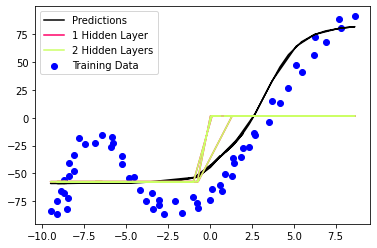

In [ ]:
print("With 2 Hidden Units:")
variables = neural_network_model(trainIN, trainY, 16, num_iterations=1001)
pred_train = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1

variables = neural_network_model(trainIN, trainY, 1, num_iterations=1001)
pred_train1 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1

variables = neural_network_model(trainIN, trainY, 2, num_iterations=1001)
pred_train2 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1 

plt.scatter(trainIN,trainOUT, color = 'b', label='Training Data')
plt.plot(*trainIN,*pred_train, color='k', label='Predictions')
plt.plot(*trainIN,*pred_train1, color = '#FF0066', label='1 Hidden Layer')
plt.plot(*trainIN,*pred_train2, color = '#CCFF66', label='2 Hidden Layers')
plt.legend(loc='best')
plt.show()

With 4 Hidden Units:
Loss after 0 iterations: 6.995480
Loss after 50 iterations: 2.248942
Loss after 100 iterations: 2.327482
Loss after 150 iterations: 2.277851
Loss after 200 iterations: 2.160334
Loss after 250 iterations: 1.979190
Loss after 300 iterations: 1.734226
Loss after 350 iterations: 1.479821
Loss after 400 iterations: 1.288748
Loss after 450 iterations: 1.629725
Loss after 500 iterations: 1.575194
Loss after 550 iterations: 1.543532
Loss after 600 iterations: 1.520613
Loss after 650 iterations: 1.504165
Loss after 700 iterations: 1.492760
Loss after 750 iterations: 1.485448
Loss after 800 iterations: 1.481530
Loss after 850 iterations: 1.480444
Loss after 900 iterations: 1.481703
Loss after 950 iterations: 1.486777
Loss after 1000 iterations: 1.421776

 [6.995480251572768, 4.199344611615024, 3.5752185238343155, 3.132898785860906, 2.7805975049460168, 2.512921483665139, 2.3220035557200314, 2.19453087906124, 2.114863578816377, 2.068595315519369, 2.0443815397118295, 2.03416819

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Loss after 950 iterations: 2.803199
Loss after 1000 iterations: 2.803199

 [6.721373154285065, 5.692473391023312, 5.150881997889772, 4.8118095949273245, 4.558228089172341, 4.335865082468739, 4.13305821438773, 3.956626082860199, 3.8105525383241057, 3.6923509845626703, 3.5964872784277335, 3.517325334853082, 3.4503188816079677, 3.392162781425802, 3.3405888712177405, 3.2940949495466167, 3.251702058924867, 3.2127686137162965, 3.1768620994432184, 3.143676801764469, 3.112983415525298, 3.084598806590653, 3.058367924142056, 3.034152973241871, 3.011826999463667, 2.9912702168501957, 2.972368058397785, 2.955010291997361, 2.9390907651175997, 2.924507487089669, 2.911162859497357, 2.898963937173835, 2.8878226525224475, 2.877655969751679, 2.868385957422993, 2.859939780894148, 2.8522496234883823, 2.8452525485504085, 2.8388903154205076, 2.833109161781615, 2.8278595634909736, 2.823095981336451, 2.8187766024282492, 2.814863082304788, 2.81132029237731, 2.8081160760929635, 2.8052210161637388, 2.802608214374

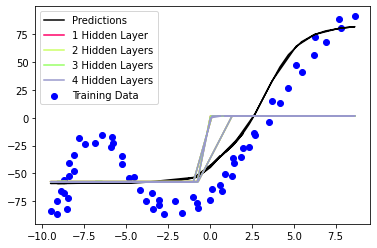

In [ ]:
print("With 4 Hidden Units:")
variables = neural_network_model(trainIN, trainY, 16, num_iterations=1001)
pred_train = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1

variables = neural_network_model(trainIN, trainY, 1, num_iterations=1001)
pred_train1 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1

variables = neural_network_model(trainIN, trainY, 2, num_iterations=1001)
pred_train2 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1 

variables = neural_network_model(trainIN, trainY, 3, num_iterations=1001)
pred_train3 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1 

variables = neural_network_model(trainIN, trainY, 4, num_iterations=1001)
pred_train4 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1 

plt.scatter(trainIN,trainOUT, color = 'b', label='Training Data')
plt.plot(*trainIN,*pred_train, color='k', label='Predictions')
plt.plot(*trainIN,*pred_train1, color = '#FF0066', label='1 Hidden Layer')
plt.plot(*trainIN,*pred_train2, color = '#CCFF66', label='2 Hidden Layers')
plt.plot(*trainIN,*pred_train3, color = '#99FF66', label='3 Hidden Layers')
plt.plot(*trainIN,*pred_train4, color = '#9999CC', label='4 Hidden Layers')
plt.legend(loc='best')
plt.show()

With 8 Hidden Units:
Loss after 0 iterations: 6.995480
Loss after 50 iterations: 2.248942
Loss after 100 iterations: 2.327482
Loss after 150 iterations: 2.277851
Loss after 200 iterations: 2.160334
Loss after 250 iterations: 1.979190
Loss after 300 iterations: 1.734226
Loss after 350 iterations: 1.479821
Loss after 400 iterations: 1.288748
Loss after 450 iterations: 1.629725
Loss after 500 iterations: 1.575194
Loss after 550 iterations: 1.543532
Loss after 600 iterations: 1.520613
Loss after 650 iterations: 1.504165
Loss after 700 iterations: 1.492760
Loss after 750 iterations: 1.485448
Loss after 800 iterations: 1.481530
Loss after 850 iterations: 1.480444
Loss after 900 iterations: 1.481703
Loss after 950 iterations: 1.486777
Loss after 1000 iterations: 1.421776

 [6.995480251572768, 4.199344611615024, 3.5752185238343155, 3.132898785860906, 2.7805975049460168, 2.512921483665139, 2.3220035557200314, 2.19453087906124, 2.114863578816377, 2.068595315519369, 2.0443815397118295, 2.03416819

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Loss after 450 iterations: 2.803132
Loss after 500 iterations: 2.803168
Loss after 550 iterations: 2.803185
Loss after 600 iterations: 2.803192
Loss after 650 iterations: 2.803196
Loss after 700 iterations: 2.803197
Loss after 750 iterations: 2.803198
Loss after 800 iterations: 2.803198
Loss after 850 iterations: 2.803199
Loss after 900 iterations: 2.803199
Loss after 950 iterations: 2.803199
Loss after 1000 iterations: 2.803199

 [6.721373154285065, 5.692473391023312, 5.150881997889772, 4.8118095949273245, 4.558228089172341, 4.335865082468739, 4.13305821438773, 3.956626082860199, 3.8105525383241057, 3.6923509845626703, 3.5964872784277335, 3.517325334853082, 3.4503188816079677, 3.392162781425802, 3.3405888712177405, 3.2940949495466167, 3.251702058924867, 3.2127686137162965, 3.1768620994432184, 3.143676801764469, 3.112983415525298, 3.084598806590653, 3.058367924142056, 3.034152973241871, 3.011826999463667, 2.9912702168501957, 2.972368058397785, 2.955010291997361, 2.9390907651175997, 2.9

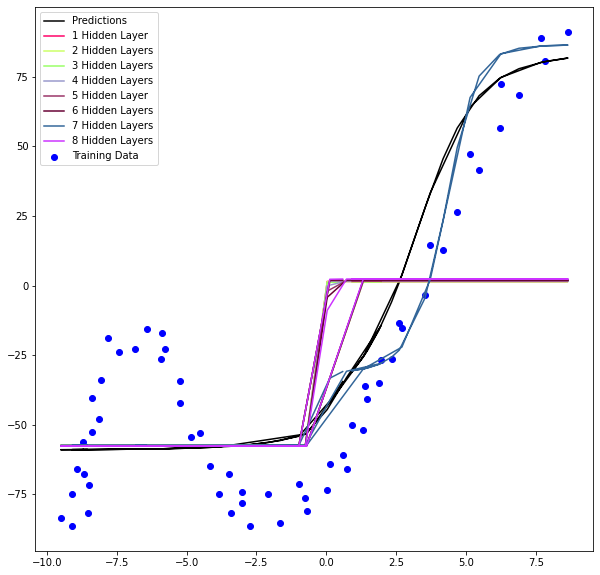

In [ ]:
print("With 8 Hidden Units:")
variables = neural_network_model(trainIN, trainY, 16, num_iterations=1001)
pred_train = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1

variables = neural_network_model(trainIN, trainY, 1, num_iterations=1001)
pred_train1 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1

variables = neural_network_model(trainIN, trainY, 2, num_iterations=1001)
pred_train2 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1 

variables = neural_network_model(trainIN, trainY, 3, num_iterations=1001)
pred_train3 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1 

variables = neural_network_model(trainIN, trainY, 4, num_iterations=1001)
pred_train4 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1 

variables = neural_network_model(trainIN, trainY, 5, num_iterations=1001)
pred_train5 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1

variables = neural_network_model(trainIN, trainY, 6, num_iterations=1001)
pred_train6 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1 

variables = neural_network_model(trainIN, trainY, 7, num_iterations=1001)
pred_train7 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1 

variables = neural_network_model(trainIN, trainY, 8, num_iterations=1001)
pred_train8 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1


plt.scatter(trainIN,trainOUT, color = 'b', label='Training Data')
plt.plot(*trainIN,*pred_train, color='k', label='Predictions')
plt.plot(*trainIN,*pred_train1, color = '#FF0066', label='1 Hidden Layer')
plt.plot(*trainIN,*pred_train2, color = '#CCFF66', label='2 Hidden Layers')
plt.plot(*trainIN,*pred_train3, color = '#99FF66', label='3 Hidden Layers')
plt.plot(*trainIN,*pred_train4, color = '#9999CC', label='4 Hidden Layers')
plt.plot(*trainIN,*pred_train5, color = '#993366', label='5 Hidden Layer')
plt.plot(*trainIN,*pred_train6, color = '#660033', label='6 Hidden Layers')
plt.plot(*trainIN,*pred_train7, color = '#336699', label='7 Hidden Layers')
plt.plot(*trainIN,*pred_train8, color = '#CC33FF', label='8 Hidden Layers')
plt.legend(loc='best')
plt.show()

With 16 Hidden Units:
Loss after 0 iterations: 6.995480
Loss after 50 iterations: 2.248942
Loss after 100 iterations: 2.327482
Loss after 150 iterations: 2.277851
Loss after 200 iterations: 2.160334
Loss after 250 iterations: 1.979190
Loss after 300 iterations: 1.734226
Loss after 350 iterations: 1.479821
Loss after 400 iterations: 1.288748
Loss after 450 iterations: 1.629725
Loss after 500 iterations: 1.575194
Loss after 550 iterations: 1.543532
Loss after 600 iterations: 1.520613
Loss after 650 iterations: 1.504165
Loss after 700 iterations: 1.492760
Loss after 750 iterations: 1.485448
Loss after 800 iterations: 1.481530
Loss after 850 iterations: 1.480444
Loss after 900 iterations: 1.481703
Loss after 950 iterations: 1.486777
Loss after 1000 iterations: 1.421776

 [6.995480251572768, 4.199344611615024, 3.5752185238343155, 3.132898785860906, 2.7805975049460168, 2.512921483665139, 2.3220035557200314, 2.19453087906124, 2.114863578816377, 2.068595315519369, 2.0443815397118295, 2.0341681

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Loss after 900 iterations: 2.803199
Loss after 950 iterations: 2.803199
Loss after 1000 iterations: 2.803199

 [6.721373154285065, 5.692473391023312, 5.150881997889772, 4.8118095949273245, 4.558228089172341, 4.335865082468739, 4.13305821438773, 3.956626082860199, 3.8105525383241057, 3.6923509845626703, 3.5964872784277335, 3.517325334853082, 3.4503188816079677, 3.392162781425802, 3.3405888712177405, 3.2940949495466167, 3.251702058924867, 3.2127686137162965, 3.1768620994432184, 3.143676801764469, 3.112983415525298, 3.084598806590653, 3.058367924142056, 3.034152973241871, 3.011826999463667, 2.9912702168501957, 2.972368058397785, 2.955010291997361, 2.9390907651175997, 2.924507487089669, 2.911162859497357, 2.898963937173835, 2.8878226525224475, 2.877655969751679, 2.868385957422993, 2.859939780894148, 2.8522496234883823, 2.8452525485504085, 2.8388903154205076, 2.833109161781615, 2.8278595634909736, 2.823095981336451, 2.8187766024282492, 2.814863082304788, 2.81132029237731, 2.8081160760929635

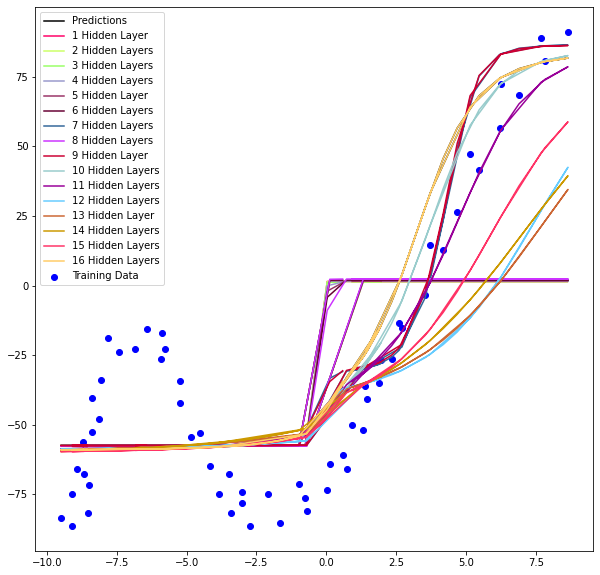

In [ ]:
print("With 16 Hidden Units:")
variables = neural_network_model(trainIN, trainY, 16, num_iterations=1001)
pred_train = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1

variables = neural_network_model(trainIN, trainY, 1, num_iterations=1001)
pred_train1 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1

variables = neural_network_model(trainIN, trainY, 2, num_iterations=1001)
pred_train2 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1 

variables = neural_network_model(trainIN, trainY, 3, num_iterations=1001)
pred_train3 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1 

variables = neural_network_model(trainIN, trainY, 4, num_iterations=1001)
pred_train4 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1 

variables = neural_network_model(trainIN, trainY, 5, num_iterations=1001)
pred_train5 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1

variables = neural_network_model(trainIN, trainY, 6, num_iterations=1001)
pred_train6 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1 

variables = neural_network_model(trainIN, trainY, 7, num_iterations=1001)
pred_train7 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1 

variables = neural_network_model(trainIN, trainY, 8, num_iterations=1001)
pred_train8 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1

variables = neural_network_model(trainIN, trainY, 9, num_iterations=1001)
pred_train9 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1

variables = neural_network_model(trainIN, trainY, 10, num_iterations=1001)
pred_train10 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1 

variables = neural_network_model(trainIN, trainY, 11, num_iterations=1001)
pred_train11 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1 

variables = neural_network_model(trainIN, trainY, 12, num_iterations=1001)
pred_train12 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1 

variables = neural_network_model(trainIN, trainY, 13, num_iterations=1001)
pred_train13 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1

variables = neural_network_model(trainIN, trainY, 14, num_iterations=1001)
pred_train14 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1 

variables = neural_network_model(trainIN, trainY, 15, num_iterations=1001)
pred_train15 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1 

variables = neural_network_model(trainIN, trainY, 16, num_iterations=1001)
pred_train16 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1

plt.scatter(trainIN,trainOUT, color = 'b', label='Training Data')
plt.plot(*trainIN,*pred_train, color='k', label='Predictions')
plt.plot(*trainIN,*pred_train1, color = '#FF0066', label='1 Hidden Layer')
plt.plot(*trainIN,*pred_train2, color = '#CCFF66', label='2 Hidden Layers')
plt.plot(*trainIN,*pred_train3, color = '#99FF66', label='3 Hidden Layers')
plt.plot(*trainIN,*pred_train4, color = '#9999CC', label='4 Hidden Layers')
plt.plot(*trainIN,*pred_train5, color = '#993366', label='5 Hidden Layer')
plt.plot(*trainIN,*pred_train6, color = '#660033', label='6 Hidden Layers')
plt.plot(*trainIN,*pred_train7, color = '#336699', label='7 Hidden Layers')
plt.plot(*trainIN,*pred_train8, color = '#CC33FF', label='8 Hidden Layers')
plt.plot(*trainIN,*pred_train9, color = '#CC0033', label='9 Hidden Layer')
plt.plot(*trainIN,*pred_train10, color = '#99CCCC', label='10 Hidden Layers')
plt.plot(*trainIN,*pred_train11, color = '#990099', label='11 Hidden Layers')
plt.plot(*trainIN,*pred_train12, color = '#66CCFF', label='12 Hidden Layers')
plt.plot(*trainIN,*pred_train13, color = '#CC6633', label='13 Hidden Layer')
plt.plot(*trainIN,*pred_train14, color = '#CC9900', label='14 Hidden Layers')
plt.plot(*trainIN,*pred_train15, color = '#FF3366', label='15 Hidden Layers')
plt.plot(*trainIN,*pred_train16, color = '#FFCC66', label='16 Hidden Layers')
plt.legend(loc='upper left')
plt.show()

With 32 Hidden Units:
Loss after 0 iterations: 6.995480
Loss after 50 iterations: 2.248942
Loss after 100 iterations: 2.327482
Loss after 150 iterations: 2.277851
Loss after 200 iterations: 2.160334
Loss after 250 iterations: 1.979190
Loss after 300 iterations: 1.734226
Loss after 350 iterations: 1.479821
Loss after 400 iterations: 1.288748
Loss after 450 iterations: 1.629725
Loss after 500 iterations: 1.575194
Loss after 550 iterations: 1.543532
Loss after 600 iterations: 1.520613
Loss after 650 iterations: 1.504165
Loss after 700 iterations: 1.492760
Loss after 750 iterations: 1.485448
Loss after 800 iterations: 1.481530
Loss after 850 iterations: 1.480444
Loss after 900 iterations: 1.481703
Loss after 950 iterations: 1.486777
Loss after 1000 iterations: 1.421776

 [6.995480251572768, 4.199344611615024, 3.5752185238343155, 3.132898785860906, 2.7805975049460168, 2.512921483665139, 2.3220035557200314, 2.19453087906124, 2.114863578816377, 2.068595315519369, 2.0443815397118295, 2.0341681

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  



Loss after 550 iterations: 2.803185
Loss after 600 iterations: 2.803192
Loss after 650 iterations: 2.803196
Loss after 700 iterations: 2.803197
Loss after 750 iterations: 2.803198
Loss after 800 iterations: 2.803198
Loss after 850 iterations: 2.803199
Loss after 900 iterations: 2.803199
Loss after 950 iterations: 2.803199
Loss after 1000 iterations: 2.803199

 [6.721373154285065, 5.692473391023312, 5.150881997889772, 4.8118095949273245, 4.558228089172341, 4.335865082468739, 4.13305821438773, 3.956626082860199, 3.8105525383241057, 3.6923509845626703, 3.5964872784277335, 3.517325334853082, 3.4503188816079677, 3.392162781425802, 3.3405888712177405, 3.2940949495466167, 3.251702058924867, 3.2127686137162965, 3.1768620994432184, 3.143676801764469, 3.112983415525298, 3.084598806590653, 3.058367924142056, 3.034152973241871, 3.011826999463667, 2.9912702168501957, 2.972368058397785, 2.955010291997361, 2.9390907651175997, 2.924507487089669, 2.911162859497357, 2.898963937173835, 2.887822652522447

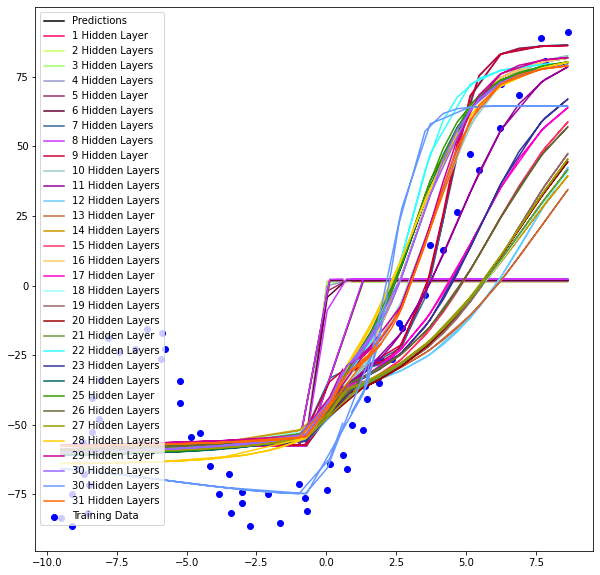

In [ ]:
print("With 32 Hidden Units:")
variables = neural_network_model(trainIN, trainY, 16, num_iterations=1001)
pred_train = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1

variables = neural_network_model(trainIN, trainY, 1, num_iterations=1001)
pred_train1 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1

variables = neural_network_model(trainIN, trainY, 2, num_iterations=1001)
pred_train2 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1 

variables = neural_network_model(trainIN, trainY, 3, num_iterations=1001)
pred_train3 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1 

variables = neural_network_model(trainIN, trainY, 4, num_iterations=1001)
pred_train4 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1 

variables = neural_network_model(trainIN, trainY, 5, num_iterations=1001)
pred_train5 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1

variables = neural_network_model(trainIN, trainY, 6, num_iterations=1001)
pred_train6 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1 

variables = neural_network_model(trainIN, trainY, 7, num_iterations=1001)
pred_train7 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1 

variables = neural_network_model(trainIN, trainY, 8, num_iterations=1001)
pred_train8 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1

variables = neural_network_model(trainIN, trainY, 9, num_iterations=1001)
pred_train9 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1

variables = neural_network_model(trainIN, trainY, 10, num_iterations=1001)
pred_train10 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1 

variables = neural_network_model(trainIN, trainY, 11, num_iterations=1001)
pred_train11 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1 

variables = neural_network_model(trainIN, trainY, 12, num_iterations=1001)
pred_train12 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1 

variables = neural_network_model(trainIN, trainY, 13, num_iterations=1001)
pred_train13 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1

variables = neural_network_model(trainIN, trainY, 14, num_iterations=1001)
pred_train14 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1 

variables = neural_network_model(trainIN, trainY, 15, num_iterations=1001)
pred_train15 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1 

variables = neural_network_model(trainIN, trainY, 16, num_iterations=1001)
pred_train16 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1

variables = neural_network_model(trainIN, trainY, 17, num_iterations=1001)
pred_train17 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1

variables = neural_network_model(trainIN, trainY, 18, num_iterations=1001)
pred_train18 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1 

variables = neural_network_model(trainIN, trainY, 19, num_iterations=1001)
pred_train19 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1 

variables = neural_network_model(trainIN, trainY, 20, num_iterations=1001)
pred_train20 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1 

variables = neural_network_model(trainIN, trainY, 21, num_iterations=1001)
pred_train21 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1

variables = neural_network_model(trainIN, trainY, 22, num_iterations=1001)
pred_train22 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1 

variables = neural_network_model(trainIN, trainY, 23, num_iterations=1001)
pred_train23 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1 

variables = neural_network_model(trainIN, trainY, 24, num_iterations=1001)
pred_train24 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1

variables = neural_network_model(trainIN, trainY, 25, num_iterations=1001)
pred_train25 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1

variables = neural_network_model(trainIN, trainY, 26, num_iterations=1001)
pred_train26 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1 

variables = neural_network_model(trainIN, trainY, 27, num_iterations=1001)
pred_train27 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1 

variables = neural_network_model(trainIN, trainY, 28, num_iterations=1001)
pred_train28 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1 

variables = neural_network_model(trainIN, trainY, 29, num_iterations=1001)
pred_train29 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1

variables = neural_network_model(trainIN, trainY, 30, num_iterations=1001)
pred_train30 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1 

variables = neural_network_model(trainIN, trainY, 31, num_iterations=1001)
pred_train31 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1 

variables = neural_network_model(trainIN, trainY, 32, num_iterations=1001)
pred_train32 = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1

plt.scatter(trainIN,trainOUT, color = 'b', label='Training Data')
plt.plot(*trainIN,*pred_train, color='k', label='Predictions')
plt.plot(*trainIN,*pred_train1, color = '#FF0066', label='1 Hidden Layer')
plt.plot(*trainIN,*pred_train2, color = '#CCFF66', label='2 Hidden Layers')
plt.plot(*trainIN,*pred_train3, color = '#99FF66', label='3 Hidden Layers')
plt.plot(*trainIN,*pred_train4, color = '#9999CC', label='4 Hidden Layers')
plt.plot(*trainIN,*pred_train5, color = '#993366', label='5 Hidden Layer')
plt.plot(*trainIN,*pred_train6, color = '#660033', label='6 Hidden Layers')
plt.plot(*trainIN,*pred_train7, color = '#336699', label='7 Hidden Layers')
plt.plot(*trainIN,*pred_train8, color = '#CC33FF', label='8 Hidden Layers')
plt.plot(*trainIN,*pred_train9, color = '#CC0033', label='9 Hidden Layer')
plt.plot(*trainIN,*pred_train10, color = '#99CCCC', label='10 Hidden Layers')
plt.plot(*trainIN,*pred_train11, color = '#990099', label='11 Hidden Layers')
plt.plot(*trainIN,*pred_train12, color = '#66CCFF', label='12 Hidden Layers')
plt.plot(*trainIN,*pred_train13, color = '#CC6633', label='13 Hidden Layer')
plt.plot(*trainIN,*pred_train14, color = '#CC9900', label='14 Hidden Layers')
plt.plot(*trainIN,*pred_train15, color = '#FF3366', label='15 Hidden Layers')
plt.plot(*trainIN,*pred_train16, color = '#FFCC66', label='16 Hidden Layers')
plt.plot(*trainIN,*pred_train17, color = '#FF00CC', label='17 Hidden Layer')
plt.plot(*trainIN,*pred_train18, color = '#99FFFF', label='18 Hidden Layers')
plt.plot(*trainIN,*pred_train19, color = '#996666', label='19 Hidden Layers')
plt.plot(*trainIN,*pred_train20, color = '#990000', label='20 Hidden Layers')
plt.plot(*trainIN,*pred_train21, color = '#669933', label='21 Hidden Layer')
plt.plot(*trainIN,*pred_train22, color = '#33FFFF', label='22 Hidden Layers')
plt.plot(*trainIN,*pred_train23, color = '#333399', label='23 Hidden Layers')
plt.plot(*trainIN,*pred_train24, color = '#006666', label='24 Hidden Layers')
plt.plot(*trainIN,*pred_train25, color = '#339900', label='25 Hidden Layer')
plt.plot(*trainIN,*pred_train26, color = '#666633', label='26 Hidden Layers')
plt.plot(*trainIN,*pred_train27, color = '#999900', label='27 Hidden Layers')
plt.plot(*trainIN,*pred_train28, color = '#FFCC00', label='28 Hidden Layers')
plt.plot(*trainIN,*pred_train29, color = '#CC0099', label='29 Hidden Layer')
plt.plot(*trainIN,*pred_train30, color = '#9966FF', label='30 Hidden Layers')
plt.plot(*trainIN,*pred_train31, color = '#6699FF', label='30 Hidden Layers')
plt.plot(*trainIN,*pred_train32, color = '#FF6600', label='31 Hidden Layers')
plt.legend(loc='upper left')
plt.show()

With Train Set:
Loss after 0 iterations: 6.995480
Loss after 50 iterations: 2.248942
Loss after 100 iterations: 2.327482
Loss after 150 iterations: 2.277851
Loss after 200 iterations: 2.160334
Loss after 250 iterations: 1.979190
Loss after 300 iterations: 1.734226
Loss after 350 iterations: 1.479821
Loss after 400 iterations: 1.288748
Loss after 450 iterations: 1.629725
Loss after 500 iterations: 1.575194
Loss after 550 iterations: 1.543532
Loss after 600 iterations: 1.520613
Loss after 650 iterations: 1.504165
Loss after 700 iterations: 1.492760
Loss after 750 iterations: 1.485448
Loss after 800 iterations: 1.481530
Loss after 850 iterations: 1.480444
Loss after 900 iterations: 1.481703
Loss after 950 iterations: 1.486777
Loss after 1000 iterations: 1.421776

 [6.995480251572768, 4.199344611615024, 3.5752185238343155, 3.132898785860906, 2.7805975049460168, 2.512921483665139, 2.3220035557200314, 2.19453087906124, 2.114863578816377, 2.068595315519369, 2.0443815397118295, 2.0341681947647

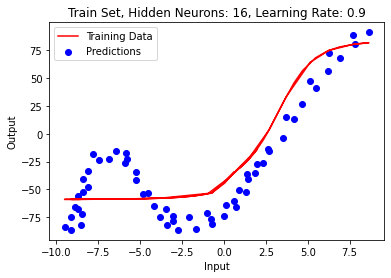

In [ ]:
print("With Train Set:")
variables = neural_network_model(trainIN, trainY, 16, num_iterations=1001)

pred_train = (prediction(variables, trainIN)*(max_TOUT-min_TOUT))+min_TOUT-1
pred_tr = prediction(variables, trainIN)
# print(pred_train)
plt.scatter(trainIN,trainOUT, color='b', label='Training Data')
plt.plot(*trainIN,*pred_train, color='r', label='Predictions')
plt.title("Train Set, Hidden Neurons: 16, Learning Rate: 0.9") 
plt.xlabel("Input") 
plt.ylabel("Output")
plt.legend(["Training Data", "Predictions"])
plt.show()

In [ ]:
print("Linear Regression Loss on Train Set:")
variables = neural_network_model(trainX, trainY, 0, num_iterations=1)

Linear Regression Loss on Train Set:
Loss after 0 iterations: 6.640506

 [6.640506345546962]

 Standadrd Deviation in Loss =  0.0

 Loss Averaged Over Instances 6.640506345546962


With Test Set:
Loss after 0 iterations: 4.272041
Loss after 50 iterations: 1.551166
Loss after 100 iterations: 1.544574
Loss after 150 iterations: 1.523356
Loss after 200 iterations: 1.479554
Loss after 250 iterations: 1.418747
Loss after 300 iterations: 1.335549
Loss after 350 iterations: 1.231100
Loss after 400 iterations: 1.379096
Loss after 450 iterations: 1.307638
Loss after 500 iterations: 1.241954
Loss after 550 iterations: 1.186675
Loss after 600 iterations: 1.142630
Loss after 650 iterations: 1.108497
Loss after 700 iterations: 1.082326
Loss after 750 iterations: 1.062307
Loss after 800 iterations: 1.047008
Loss after 850 iterations: 1.035372
Loss after 900 iterations: 1.026660
Loss after 950 iterations: 0.883613
Loss after 1000 iterations: 0.755106

 [4.272041205402555, 3.262052450415758, 2.755288910083964, 2.3142322503769517, 1.9523344323485772, 1.7128650596627977, 1.5799011179343039, 1.515621089927211, 1.4879985991824762, 1.4779626862712993, 1.4759836066507046, 1.4777245658

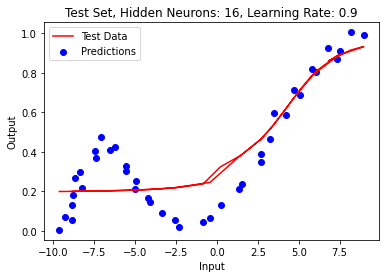

In [ ]:
print("With Test Set:")
variables = neural_network_model(testIN, testY, 16, num_iterations=1001)

pred_test = (prediction(variables, testIN)*(max_TOUTT-min_TOUTT))+min_TOUTT-1
pred_ts = prediction(variables, testIN)
# print(pred_train)
plt.scatter(testIN,testY, color='b', label='Test Data')
plt.plot(*testIN,*pred_ts, color='r', label='Predictions')
plt.title("Test Set, Hidden Neurons: 16, Learning Rate: 0.9") 
plt.xlabel("Input") 
plt.ylabel("Output") 
plt.legend(["Test Data", "Predictions"])
plt.show()

In [ ]:
print("Standarad Deviations and Averages Train:")

print("\n 2 Hidden, Train:")
variables = neural_network_model(trainIN, trainY, 2, num_iterations=1001)
print("\n 4 Hidden, Train:")
variables = neural_network_model(trainIN, trainY, 4, num_iterations=1001)
print("\n 8 Hidden, Train:")
variables = neural_network_model(trainIN, trainY, 8, num_iterations=1001)
print("\n 16 Hidden, Train:")
variables = neural_network_model(trainIN, trainY, 16, num_iterations=1001)
print("\n 32 Hidden, Train:")
variables = neural_network_model(trainIN, trainY, 32, num_iterations=1001)

Standarad Deviations and Averages Train:

 2 Hidden, Train:
Loss after 0 iterations: 6.472265
Loss after 50 iterations: 2.673629
Loss after 100 iterations: 2.719038
Loss after 150 iterations: 2.743272
Loss after 200 iterations: 2.759155
Loss after 250 iterations: 2.770939
Loss after 300 iterations: 2.779904
Loss after 350 iterations: 2.786631
Loss after 400 iterations: 2.791568
Loss after 450 iterations: 2.795116
Loss after 500 iterations: 2.797624
Loss after 550 iterations: 2.799375
Loss after 600 iterations: 2.800586
Loss after 650 iterations: 2.801418
Loss after 700 iterations: 2.801987
Loss after 750 iterations: 2.802376
Loss after 800 iterations: 2.802640
Loss after 850 iterations: 2.802819
Loss after 900 iterations: 2.802941
Loss after 950 iterations: 2.803024
Loss after 1000 iterations: 2.803080

 [6.4722648265737925, 5.363815485421536, 4.631232263494184, 4.075449018974927, 3.678011477925784, 3.407418508464257, 3.2243991403244574, 3.098224103141009, 3.008445719019255, 2.94221052

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Loss after 200 iterations: 2.693610
Loss after 250 iterations: 2.710190
Loss after 300 iterations: 2.723220
Loss after 350 iterations: 2.733900
Loss after 400 iterations: 2.743038
Loss after 450 iterations: 2.751084
Loss after 500 iterations: 2.758257
Loss after 550 iterations: 2.764655
Loss after 600 iterations: 2.770329
Loss after 650 iterations: 2.775315
Loss after 700 iterations: 2.779657
Loss after 750 iterations: 2.783403
Loss after 800 iterations: 2.786609
Loss after 850 iterations: 2.789335
Loss after 900 iterations: 2.791641
Loss after 950 iterations: 2.793581
Loss after 1000 iterations: 2.795207

 [6.683097697675683, 5.097231390353737, 4.3529648731748605, 3.8112832335849114, 3.431491085435197, 3.1729250657613344, 2.994848516616822, 2.869717951954966, 2.7798427469540328, 2.7138802068062113, 2.664522559251102, 2.6269860203668367, 2.5980736931270147, 2.5756076619602535, 2.5580785390187577, 2.544421383439916, 2.5338680874142687, 2.5258488701803663, 2.5199268491724927, 2.515755324

In [ ]:
print("Standarad Deviations and Averages test:")
 
print("\n 2 Hidden, test:")
variables = neural_network_model(testIN, testY, 2, num_iterations=1001)
print("\n 4 Hidden, test:")
variables = neural_network_model(testIN, testY, 4, num_iterations=1001)
print("\n 8 Hidden, test:")
variables = neural_network_model(testIN, testY, 8, num_iterations=1001)
print("\n 16 Hidden, test:")
variables = neural_network_model(testIN, testY, 16, num_iterations=1001)
print("\n 32 Hidden, test:")
variables = neural_network_model(testIN, testY, 32, num_iterations=1001)

Standarad Deviations and Averages test:

 2 Hidden, test:
Loss after 0 iterations: 4.060014
Loss after 50 iterations: 1.778084
Loss after 100 iterations: 1.785994
Loss after 150 iterations: 1.787194
Loss after 200 iterations: 1.787310
Loss after 250 iterations: 1.787321
Loss after 300 iterations: 1.787323
Loss after 350 iterations: 1.787323
Loss after 400 iterations: 1.787323
Loss after 450 iterations: 1.787323
Loss after 500 iterations: 1.787323
Loss after 550 iterations: 1.787323
Loss after 600 iterations: 1.787323
Loss after 650 iterations: 1.787323
Loss after 700 iterations: 1.787323
Loss after 750 iterations: 1.787323
Loss after 800 iterations: 1.787323
Loss after 850 iterations: 1.787323
Loss after 900 iterations: 1.787323
Loss after 950 iterations: 1.787323
Loss after 1000 iterations: 1.787323

 [4.060014230076529, 3.7810297835849997, 3.5512109533819767, 3.315418587957664, 3.0832450784539476, 2.8769357701743266, 2.7056983150348146, 2.5680059742539987, 2.457943204401715, 2.368766

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  



Loss after 300 iterations: 0.745917
Loss after 350 iterations: 0.691673
Loss after 400 iterations: 0.674687
Loss after 450 iterations: 0.670441
Loss after 500 iterations: 0.669678
Loss after 550 iterations: 0.670569
Loss after 600 iterations: 0.672587
Loss after 650 iterations: 0.675597
Loss after 700 iterations: 0.679600
Loss after 750 iterations: 0.684641
Loss after 800 iterations: 0.690772
Loss after 850 iterations: 0.742220
Loss after 900 iterations: 0.672225
Loss after 950 iterations: 1.253154
Loss after 1000 iterations: 0.706801

 [4.12947494776602, 3.7020803956934136, 3.446384672210556, 3.1626527113513054, 2.8655941838500483, 2.5988825833342446, 2.3803043823614964, 2.2063626996619794, 2.0691992565635604, 1.9623543796476288, 1.880367194566695, 1.818192144515772, 1.7713232102227743, 1.7360073879202313, 1.7092921031173707, 1.688943937361394, 1.6733175578894173, 1.6612221583793234, 1.651804049359881, 1.6444495172981624, 1.6387074800345194, 1.634231619392378, 1.6307423617629913, 1.6